
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Refresher Course on Matrix Analysis and Optimization</h1><h2>Part I: Matrix Analysis</h2></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> <a href="https://ljk.imag.fr/membres/Jerome.Malick/" style="font-size: 16px; font-weight: bold">Jerome Malick</a> </td>
</tr>
</table>


#  1- Linear Systems Resolution with applications to Regression


In this example, we use linear algebra to extract information from data; more precisely, we predict final notes of a group of student from their profiles with the [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance) which includes secondary education students of two Portuguese schools.


Profiles include features such as student grades, demographic, social and school related features and were collected by using school reports and questionnaires. There are $m = 395$ students (examples) and we selected $n = 27$ features (see `data/student.txt` for the features description and `datat/student-mat.csv` for the csv dataset.)



Our goal is to predict a target feature (the $28$-th) which is the final grade of the student from the other features (the first $27$). We assume that the final grade can be explained by a linear combination of the other features. We are going to learn from this data using linear regression over the $m_{learn} = 300$ students (called the *learning set*). We will check our prediction by comparing the results for the other $m_{test} = 95$ students (the *testing set*).

In [1]:
import numpy as np

# File reading
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']

m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300

Mathematically, from the $m_{learn} \times (n+1)$ *learning matrix* (the number of columns is $n+1$ as a column of ones, called *intercept* for statistical reasons). $A_{learn}$ comprising of the features values of each training student in line, and the vector of the values of the target features $b_{learn}$;  we seek a size-$n+1$ *regression vector* that minimizes the squared error between  $A_{learn} x$ and $b_{learn}$. This problem boils down to the following least square problem:
$$ \min_{x\in\mathbb{R}^{n+1}}  \|  A_{learn} x - b_{learn} \|_2^2 . $$

> **Question a:** Compute (numerically!) the rank of the $m_{learn} \times (n+1)$ matrix $A_{learn}$. Does it have full (row, column) rank? Conclude about the existence and uniqueness of solutions of the problem.

> **Question b:** Compute the solution of the minimization problem using:
> 1. the least square solver of Numpy [lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
> * the Singular Value Decomposition [svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to solve $ A_{learn}^{\top} \left( A_{learn} x - b_{learn} \right) = 0$. (see the course)  
>
> Compare both solutions.

Store the solution of the minimization problem in a variable `x_reg`. The grade prediction for the students in the test set is simply 
$$ p = A_{test} x_{reg} . $$

> **Question c:** The test matrix $A_{test}$ has $m_{test} = 95$ rows (students) and $n+1 = 28$ columns (features+intercept). Compare the predicted grades with the actual observed grades in $b_{test}$

> **Question d:** Compare the relative values of the coefficients of the predictor `x_reg`. What can you observe about the relative importance of the features in the prediction?

# 2- Singular Value Decomposition and Image Compression



The goal of this exercise is to investigate the computational aspects of the SVD; and, more importantly, observing the fact that the greater the magnitude of the singular value, the greater the importance of the associated vectors in the matrix coefficients. Investigating on this latter property will be done through the SVD of the following image  seen as an array of grayscale values.


<img src="img/flower.png" alt="flower" style="width: 30%;"/>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

#### IMAGE
img = mpimg.imread('img/flower.png')
img_gray =  0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2] # Apparently these are "good" coefficients to convert to grayscale
#########

To display an image from a matrix, you can use the matplotlib command [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

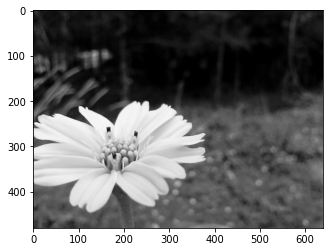

In [14]:
plt.imshow(img_gray, cmap = cm.Greys_r) 

Our goal is to investigate the significance of singular values as bearer of information for the represented image. To investigate this, we will zero 75% of the singular values of the matrix of the grayscale pixels. 

> **Question a:** How many singular values does `img_gray` have? 

Store in a variable `n_zero` the number of singular values that we will change, ie. 75% of the total number.

> **Question b:** Compute the SVD of the grayscale image `img_gray`. Generate new images (matrices of grayscale pixels) by changing the singular values in the original as follows:
> 1. Put to zero the `n_zero` smallest singular values
> * Put to zero the `n_zero` greatest singular values
> * Put to zero `n_zero` singular values at random
>
> Compare the resulting images. What can you conclude about the relative importance of the singular values?

> **Question c:** Compute the sum of the singular values for the original and modified images. What can you conclude about the visual information provided by the singular values?

# 3- PageRank and the Power Method



In this part, we will compute the PageRank ordering of the following graph.


<img src="img/graph.png" alt="graph" style="width: 50%;"/>


In PageRank, the score $x_i$ of page $i$ is equal to the sum over the pages $j$ pointing toward $i$ of their scores $x_j$  divided by their number of outgoing links $n_j$. This leads to a ranking matrix $R$ defined from the scoring method as
$$ x = Rx.$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#### Graph matrix
A = np.array([[0,1,1,0,1],[0,0,0,1,1],[1,0,0,1,0],[0,0,1,0,1],[0,1,0,0,0]])
####

> **Question a:** Explain how the ranking matrix $R$ is generated from adjacence matrix $A$ in the following code. 

In [17]:
R = np.dot( A  , np.diag(1.0/np.sum(A,0)) ) 

> **Question b:** Check numerically that $\|R\| = 1$ for some matrix norm and that the spectral radius of $R$ is equal to $1$. 

> **Question c:** Iterate the matrix $R$ a large number of times and check if the matrix is primitive. What do you notice on the eigenvalues and eigenvectors? How is defined the rank 1 matrix that you obtain? This manner of computing eigenvectors/values is called the *power method*.

> **Question d:** Recover the *Perron* eigenvector of matrix $R$. The entries of this vector are the PageRank scores of the nodes/pages of the graph. Give the PageRank ordering of the pages of the graph.

In this exercise, the graph we took led to a *primitive* matrix as seen above; this is necessary for the power method to work as the eigenvalue $1$ has to be the only one of modulus $1$. This is actually the case when the graph is strongly connected, that is when you can go from any node to any other node by following the edges. When this is not the case, our problem becomes ill posed. To overcome this problem, the ranking matrix $R$  is replaced by 
$$ M = (1-\alpha) R + \alpha J, ~~~~~~~~ \alpha\in]0,1[ $$
where is $J$ is the $5\times 5$ matrix whose entries are all $1/5$. The value of $\alpha$ originally used by Google is $0.15$.

> **Question e:** Suppress the link from $2$ to $5$. 
* Show that $M$ is column-stochastic provided that $R$ is.
* Show that the problem with $M$ is now well-posed.
* Compute the ranking for this graph.